# Deep Learning India - Assignment 2 : CIFAR-10 using Densenet

##### **Problem** : Achieve an accuracy beyond 85% for a Image classification using CIFAR-10 dataset based on [Densenet](https://arxiv.org/pdf/1608.06993.pdf) paper

##### Sample CIFAR-10 dataset

![CIFAR-10 Dataset](https://github.com/praveenraghuvanshi1512/Learning/blob/DeepLearningIndia_VV/Technical/AIML/DeepLearningIndia/Assignment_2/images/cifar2.jpg?raw=true)

### Steps ###
1. Initial Setup and configuration
2. Load CIFAR-10 dataset
3. Prepare Data
4. Create model pipeline
5. Compile Model
6. Train/Fit Model
7. Evaluate Model

### Step 1: Initial Setup and Configuration

    1.1 Set Keras backend
    1.2 Enable intellisense in jupyter notebook
    1.3 Initialize tensorboard
    1.4 Utility functions
        1.4.1 Display Images
        1.4.2 Plot Accuracy
        1.4.3 Plot Losses

In [187]:
# STEP 1: Initial Setup and Configuration

# 1.1 Set keras backend
from keras import backend as k
import os
import importlib

def set_keras_backend(backend):
    if k.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(k)
        assert k.backend() == backend

set_keras_backend("tensorflow")

if k.backend() == 'tensorflow':
    import tensorflow as tf
    print('tensorflow version: ', tf.__version__)
    
# 1.2 Enable intellisense in jupyter notebook
%config IPCompleter.greedy=True

# 1.3 Initialize Tensorboard
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir = os.path.join(
    "logs",
    "fit",
    datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

%load_ext tensorboard

tensorflow version:  2.0.0
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


####  1.4 Utility Functions
##### 1.4.1 Display Images

In [188]:
# Utility functions

from matplotlib import pyplot
from PIL import Image

# Display images
def show_images(x):
    pyplot.figure(1)
    k = 0
    for i in range(0, 4):
        for j in range(0, 4):
            pyplot.subplot2grid((4, 4), (i, j))
            pyplot.imshow(Image.fromarray(x[k]))
            k = k + 1
    # Show the plot
    pyplot.show()
    
# Display single image
def show_image(x):
    pyplot.figure(1)
    pyplot.imshow(Image.fromarray(x[0]))
    pyplot.show()


#### 1.4.2 Plot Accuracy

In [189]:
import keras
from matplotlib import pyplot as plt

def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

##### 1.4.3 Plot losses

In [190]:
# Plot Losses
import matplotlib.pyplot as plt

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### Step 2: Load CIFAR-10 dataset

In [191]:
# Step 2: Load CIFAR-10 dataset
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data();

##### Examining Dataset

In [192]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


- There are 50000 training and 10000 testing images
- CIFAR-10 dataset has color images of shape(width, height, channels) : 32 x 32 x 3
- No of channels for a colored image : 3(Red + Green + Blue)
- No of classes : 10 - Type of objects in images such as airplane, bird, truck etc.

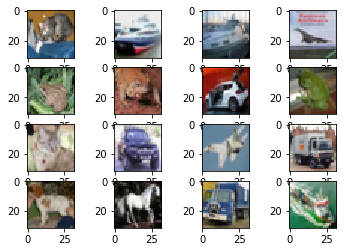

In [193]:
# Display first 16 images

show_images(X_test[:16])

### Step 3: Prepare data

In [194]:
# Intialize variables
num_classes = 10
max_pixel_value = 255
kernel_size = (3, 3)
input_filters = 64

# Input shape is a tensor of image.
# CIFAR-10 has images of dimension (witdth * height * channels[Red, Green, Blue]) as 32 x 32 x 3
input_shape = (32, 32, 3) 

batch_size = 32
epochs = 10

In [195]:
# STEP 3: Prepare Data

from keras.utils import np_utils
import numpy as np

# Converting unsigned integers to 32-bit float precision
# so that it can be better utilized during normalization such as diving by max pixel value of 255
X_train = X_train.astype(np.float32)
X_test =  X_test.astype(np.float32)

# Normalization of pixel values (to [0-1] range)
X_train /= max_pixel_value
X_test /= max_pixel_value

# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##### Examining Dataset

In [196]:
print(X_train.shape, "X_train")
print(X_test.shape, "X_test")
print(y_train.shape,"y_train")
print(y_test.shape, "y_train")

(50000, 32, 32, 3) X_train
(10000, 32, 32, 3) X_test
(50000, 10) y_train
(10000, 10) y_train


In [197]:
print('X_train[0] :\n', X_train[0])
print('\n')
print('y_train[0] :\n', y_train[0:1][0])

X_train[0] :
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.4823529

### Step 4: Create Model Pipeline - Basic CNN

In [97]:
# STEP 4: Create Model pipeline

# Learned parameter calculation :\n",
# https://www.youtube.com/watch?v=gmBfb6LNnZs\n",
# No of parameters = (Previous layer channels * Current layer filters * kernel) + bias(current filter count)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization

# Create model - Input Layer
# Learned Parameters: 0 . No parameters to be learned in input layer
model = Sequential()

# Now we'll add hidden layers

# First Convolution layer : filters: 64, kernel size: 3x3 
# Learned Parameters: (3 * 64 * 3 * 3) + 64 = 1792
model.add(Conv2D(input_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))

# Second Convolution layer: filters: 32, kernel size: 3x3
# Learned Parameters: (64 * 32 * 3 * 3) + 32 = 18464
model.add(Conv2D(32, kernel_size=kernel_size, activation='relu'))

# Flatten modifies the dimension of a tensor to a vector
# Output shape : 28 * 28 * 32 = 25088
# Learned Parameters: 0. No parameters are learned here as we are just changing the dimension
model.add(Flatten())

# Dense layer - Its a fully connected layer where all neurons from previous are connected to all neurons in dense layer
# Activation - These functions allows non-linear transformations to be performed on a given input which is a complex process
# Learned Parameter: (25088 * 10) + 10 = 250890",
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                250890    
Total params: 271,146
Trainable params: 271,146
Non-trainable params: 0
_________________________________________________________________


### Step 5: Compile Model - Configures model for training

In [157]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


### Step 6: Train/Fit Model
Save training loss and accuracy to history object for later visualization

In [35]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.4273 - accuracy: 0.4924 - val_loss: 1.2139 - val_accuracy: 0.5756
Epoch 2/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.1129 - accuracy: 0.6108 - val_loss: 1.1081 - val_accuracy: 0.6143
Epoch 3/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.9654 - accuracy: 0.6650 - val_loss: 1.1163 - val_accuracy: 0.6081
Epoch 4/10
50000/50000 [==============================] - 104s 2ms/sample - loss: 0.8682 - accuracy: 0.6971 - val_loss: 1.1323 - val_accuracy: 0.6139
Epoch 5/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.7810 - accuracy: 0.7289 - val_loss: 1.0674 - val_accuracy: 0.6411
Epoch 6/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.7011 - accuracy: 0.7570 - val_loss: 1.1341 - val_accuracy: 0.6284
Epoch 7/10
50000/50000 [==============================

##### Plot Accuracy and Losses

References
- https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network

![Interpret Model accuracy plot](https://i.stack.imgur.com/v4sP2.png)

In [37]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 19:26:44 ago. (Use '!kill 14248' to kill it.)

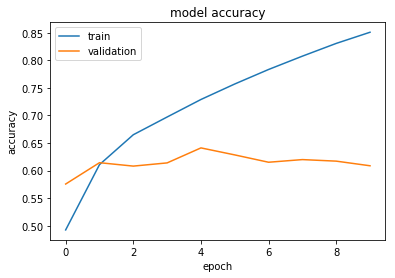

In [38]:
# Plot Accuracy
plotAccuracy(history)

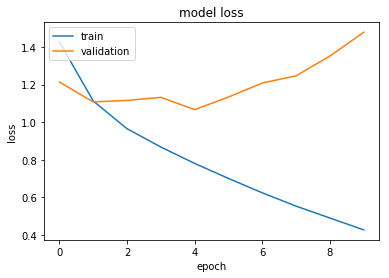

In [39]:
# Plot losses
plotLosses(history)

#### Analysis

- Validation accuracy : 60.87%
- Trainable parameters : 271,146
- The training loss is decreasing, but validation loss is way above and increasing
- Divergence between training and validation accuracy.
- Model is overfitting
- Learning rate is high : 0.001

### Step 7: Evaluate

In [40]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [41]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.4786773986816406, 0.6087]


### Observations

Image classification using Convolutional Neural Network on CIFAR-10 dataset.

- Convolutional Neural network(CNN) 
- Parameters reduced to 271,146 from 855,050 in Nultilayer perceptron(MLP) network
- Training is fast even on CPU with 1.5 mins per epoch
- Shareable parameters across layers
- Better network
- Suffering from Overfitting
- [Overfitting plots](https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)
- [Plot analysis](https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network)

### References

- [CIFAR-10 Demo](http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html)
- [Learnable Parametersin a Convolutional Neural Network(CNN) explained](https://www.youtube.com/watch?v=gmBfb6LNnZs)
- [How to calculate the number of parameters in the CNN?](https://medium.com/@iamvarman/how-to-calculate-the-number-of-parameters-in-the-cnn-5bd55364d7ca#targetText=To%20calculate%20it%2C%20we%20have,3%E2%80%931))%20%3D%2048.)
- [Understanding and Calculating the number of Parameters in Convolution Neural Networks (CNNs)](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)
- [Calculate model parameters in Convolutional Neural Networks (CIFAR-10)](https://stats.stackexchange.com/questions/336908/calculate-model-parameters-in-convolutional-neural-networks-cifar-10)
- [Overfitting plots](https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)
- [Plot analysis](https://stats.stackexchange.com/questions/292700/overfitting-in-neural-network)

******* END of Basic CNN *******

---------------------------------

# Densenet

### Introduction

Densenet is a logical extension to Renet architecture with some changes.
ResNet architecture has a fundamental building block (Identity) where you merge (additive) a previous layer into a future layer. Reasoning here is by adding additive merges we are forcing the network to learn residuals (errors i.e. diff between some previous layer and current one). In contrast, DenseNet paper proposes concatenating outputs from the previous layers instead of using the summation.


Recent work has shown that convolutional networks can be substantially deeper, more accurate, and efficient to train if they contain shorter connections between layers close to the input and those close to the output.

Resnet is based on Element-wise addition whereas Densenet is based on concatenation

##### Resnet - Element-wise addition/summation
------------------------------------------
Suppose there are 5 people(A,B,C,D,E) who contributed to a charity show an amount of $100, $200 $ 300, $400 and $500.
Total amount : $100 + $200 + $300 + $400 + $500 = $1500

- In element-wise addition , we keep on adding the items(contribution) to get the total. However, we lost the information on who(A, B, C, D, E) has contributed how much.
- We are loosing information in summation


##### Densenet - Concatenation
------------------------------
- We add the items(contributions) to get the total as well as save the contributor informtion.
- Power of feature reuse
- Every layer has information about previous layers, thereby not lossing any information.
- Diversified features compared to correlated features in Resnet
- Maintain low complexity
- More shortcut connections, better gradient flow
- Less Parameters, Computationaly efficient
- It has Bottleneck Layer. Reducing no of channels using 1x1. Dimensionality reduction
- Almost half parameters

Say you are with friends. Each of you has some money. In this case, concatenating means you will write a list of how much everyone has. Summing it would give you the total.

Concatenation means keeping every information where they are. Since you do not alter the data, that’s what should be done by default. But that’s not free. You have to keep that in memory, therefore it may be interesting to avoid it as much as possible.

![Densenet](images/densenet.jpeg)
------
![Densenet Architecture](images/densenet_architecture.jpeg)
-------
![Densenet Architecture](images/densenet_architecture_1.jpeg)

![](images/Standard_resnet_densenet.png)

![](images/Standard_resnet_densenet_2.jpeg)


### Videos

[![MLT CNN Architectures: DenseNet - theory](http://img.youtube.com/vi/wh-n-pTxMZU/0.jpg)](http://www.youtube.com/watch?v=wh-n-pTxMZU)

-------

[![MLT CNN Architectures: DenseNet - implementation](http://img.youtube.com/vi/QKtoh9FJIWQ/0.jpg)](http://www.youtube.com/watch?v=QKtoh9FJIWQ)

## Densenet - Implementation

![Densenet Architecture : Multiple Dense blocks](images/densenet_architecture_dense_blocks.jpeg)

#### Densenet Architecture - 121

![Densenet Architecture](images/densenet_architecture.jpeg)

In [198]:
# Denset function
# Note: Start with 64 filters 
# In dense block the 1 x 1 has 4 * filters and we concatenate input with output tensor
# In transition reduce channels to half of the existing


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, Dense, concatenate

def densenet(input_shape, n_classes, f = 32):

    def bn_relu_conv(x, f, k=1, s=1):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides = s, padding = 'same')(x)
        return x
    
    def dense_block(x, r):
        for _ in range(r):
            y = bn_relu_conv(x, 4 * f)
            y = bn_relu_conv(y, f, 3)
            x = concatenate([y, x])
        return x
            
            
    def transition_layer(x):
        x = bn_relu_conv(x, tf.keras.backend.int_shape(x)[-1] // 2)
        x = AvgPool2D(2, strides=2, padding='same')(x)
        return x
    
    input = Input(input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    for r in [6, 12, 24, 16]:
        d = dense_block(x, r)
        x = transition_layer(d)
    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

In [199]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_884 (Conv2D)             (None, 16, 16, 64)   9472        input_52[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_49 (MaxPooling2D) (None, 8, 8, 64)     0           conv2d_884[0][0]                 
__________________________________________________________________________________________________
batch_normalization_447 (BatchN (None, 8, 8, 64)     256         max_pooling2d_49[0][0]           
____________________________________________________________________________________________

Total params: 7,053,642
Trainable params: 6,972,170
Non-trainable params: 81,472
__________________________________________________________________________________________________


In [158]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [142]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 829s 17ms/sample - loss: 1.5127 - accuracy: 0.4708 - val_loss: 1.8454 - val_accuracy: 0.3784
Epoch 2/10
50000/50000 [==============================] - 796s 16ms/sample - loss: 1.0423 - accuracy: 0.6347 - val_loss: 1.4062 - val_accuracy: 0.5141
Epoch 3/10
50000/50000 [==============================] - 797s 16ms/sample - loss: 0.8465 - accuracy: 0.7070 - val_loss: 1.2730 - val_accuracy: 0.6035
Epoch 4/10
50000/50000 [==============================] - 795s 16ms/sample - loss: 0.7252 - accuracy: 0.7515 - val_loss: 1.3491 - val_accuracy: 0.5771
Epoch 5/10
50000/50000 [==============================] - 789s 16ms/sample - loss: 0.6217 - accuracy: 0.7849 - val_loss: 1.4609 - val_accuracy: 0.5539
Epoch 6/10
50000/50000 [==============================] - 785s 16ms/sample - loss: 0.5355 - accuracy: 0.8136 - val_loss: 0.7247 - val_accuracy: 0.7518
Epoch 7/10
50000/50000 [====================

In [143]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 1 day, 6:32:09 ago. (Use '!kill 14248' to kill it.)

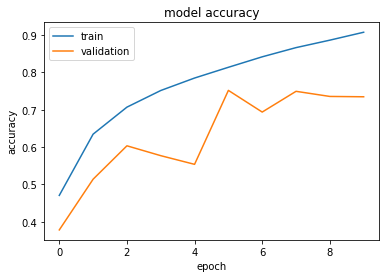

In [144]:
# Plot Accuracy
plotAccuracy(history)

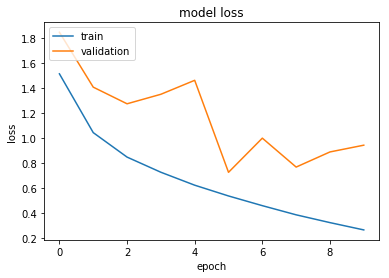

In [145]:
# Plot losses
plotLosses(history)

#### Analysis

- Validation accuracy is 73.47%
- Time per epoch is 13 mins on a normal CPU
- Validation accuracy and loss is not in accordance with Training ???
- Training loss is consistently decreasing which means model is learning specific images.
- Validation loss is going up and down ???
- Is it overfitting or under-fitting?


### Evaluate

In [146]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [147]:
# Predict score
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.9417637833595276, 0.7347]


### References

- [Densenet - Towards Datascience](https://towardsdatascience.com/densenet-2810936aeebb)
- [MLT CNN Architectures: DenseNet - theory](http://www.youtube.com/watch?v=wh-n-pTxMZU)
- [MLT CNN Architectures: DenseNet - implementation](http://www.youtube.com/watch?v=QKtoh9FJIWQ)

## Improvement 1: Increase epcohs from 10 to 50

In [148]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 876s 18ms/sample - loss: 0.2236 - accuracy: 0.9213 - val_loss: 0.9236 - val_accuracy: 0.7549
Epoch 2/50
50000/50000 [==============================] - 876s 18ms/sample - loss: 0.1964 - accuracy: 0.9297 - val_loss: 0.8736 - val_accuracy: 0.7614
Epoch 3/50
50000/50000 [==============================] - 895s 18ms/sample - loss: 0.1604 - accuracy: 0.9425 - val_loss: 0.7935 - val_accuracy: 0.7855
Epoch 4/50
50000/50000 [==============================] - 895s 18ms/sample - loss: 0.1439 - accuracy: 0.9497 - val_loss: 0.9524 - val_accuracy: 0.7664
Epoch 5/50
50000/50000 [==============================] - 885s 18ms/sample - loss: 0.1330 - accuracy: 0.9530 - val_loss: 1.1355 - val_accuracy: 0.7510
Epoch 6/50
50000/50000 [==============================] - 893s 18ms/sample - loss: 0.1209 - accuracy: 0.9572 - val_loss: 0.9907 - val_accuracy: 0.7717
Epoch 7/50
50000/50000 [====================

KeyboardInterrupt: 

In [149]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 1 day, 13:14:18 ago. (Use '!kill 14248' to kill it.)

### Analysis

- The validation accuracy was oscillating near 77%
- Had to stop after 22 epochs
- Validation loss has a zig-zag pattern. 
- Model is still overfitting
- Learning rate : 0.001

## Improvement 2: Reduce learning rate from 0.001 to 0.0001

#### STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

In [160]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1132s 23ms/sample - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.9711 - val_accuracy: 0.8153
Epoch 2/10
50000/50000 [==============================] - 1078s 22ms/sample - loss: 0.0056 - accuracy: 0.9987 - val_loss: 1.0257 - val_accuracy: 0.8183
Epoch 3/10
50000/50000 [==============================] - 1151s 23ms/sample - loss: 0.0034 - accuracy: 0.9993 - val_loss: 1.0648 - val_accuracy: 0.8178
Epoch 4/10
50000/50000 [==============================] - 1115s 22ms/sample - loss: 0.0025 - accuracy: 0.9996 - val_loss: 1.1137 - val_accuracy: 0.8195
Epoch 5/10
50000/50000 [==============================] - 1076s 22ms/sample - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.1440 - val_accuracy: 0.8197
Epoch 6/10
50000/50000 [==============================] - 1090s 22ms/sample - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.1778 - val_accuracy: 0.8173
Epoch 7/10
50000/50000 [==============

In [161]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 1 day, 17:51:04 ago. (Use '!kill 14248' to kill it.)

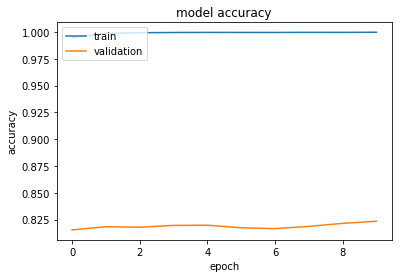

In [162]:
# Plot Accuracy
plotAccuracy(history)

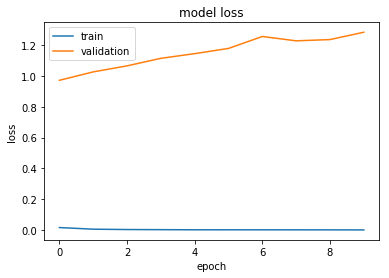

In [163]:
# Plot losses
plotLosses(history)

In [164]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [165]:
# Predict score
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.2828062757194043, 0.8234]


### Analysis

- Training reached 100% accuracy, it means model won't improve further by training more since it won't get any gradient
- CIFAR-10 dataset is less with only 50000 images for training.
- Validation accuracy improved by 9% to 82.3%
- Training time increased to 18 min/epoch

## Improvement 3: Apply data augmentation - rotation, width shift range, height shift range, horizontal flip

In [166]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [167]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [169]:
# Train/Fit model

model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])


Epoch 1/10
1562/1562 [==============================] - 2211s 1s/step - loss: 0.8404 - accuracy: 0.8262 - val_loss: 0.7570 - val_accuracy: 0.8091
Epoch 2/10
1562/1562 [==============================] - 2365s 2s/step - loss: 0.5453 - accuracy: 0.8302 - val_loss: 0.6289 - val_accuracy: 0.8102
Epoch 3/10
1562/1562 [==============================] - 2318s 1s/step - loss: 0.4943 - accuracy: 0.8340 - val_loss: 0.5680 - val_accuracy: 0.8199
Epoch 4/10
1562/1562 [==============================] - 2165s 1s/step - loss: 0.4730 - accuracy: 0.8413 - val_loss: 0.5874 - val_accuracy: 0.8128
Epoch 5/10
1562/1562 [==============================] - 2179s 1s/step - loss: 0.4560 - accuracy: 0.8466 - val_loss: 0.5309 - val_accuracy: 0.8297
Epoch 6/10
1562/1562 [==============================] - 2185s 1s/step - loss: 0.4426 - accuracy: 0.8498 - val_loss: 0.5469 - val_accuracy: 0.8203
Epoch 7/10
1562/1562 [==============================] - 2183s 1s/step - loss: 0.4327 - accuracy: 0.8544 - val_loss: 0.5501 -

In [170]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 2 days, 5:12:58 ago. (Use '!kill 14248' to kill it.)

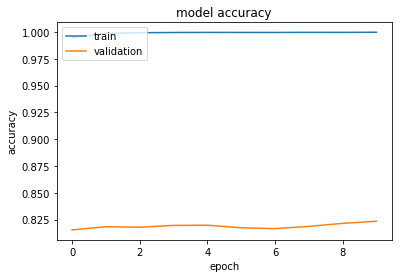

In [171]:
# Plot Accuracy
plotAccuracy(history)

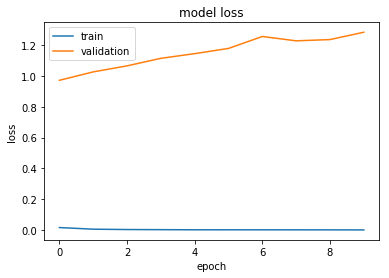

In [172]:
# Plot losses
plotLosses(history)

In [173]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [174]:
# Predict score
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.5014716332197189, 0.8351]


### Analysis

- Validation accuracy improved by 1% only
- Training time increased to 35 mins
- Data augmentation has no significant impact

## Improvement 4: Apply data augmentation: height_shift_range, horizontal_flip, zoom

In [200]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=[0.5,1.0]
    )
datagen.fit(X_train)

In [201]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [202]:
# Train/Fit model

model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])

Epoch 1/10
1562/1562 [==============================] - 2463s 2s/step - loss: 1.7023 - accuracy: 0.3833 - val_loss: 1.7120 - val_accuracy: 0.3903
Epoch 2/10
1562/1562 [==============================] - 2462s 2s/step - loss: 1.4522 - accuracy: 0.4797 - val_loss: 1.4904 - val_accuracy: 0.4665
Epoch 3/10
1562/1562 [==============================] - 2491s 2s/step - loss: 1.3216 - accuracy: 0.5292 - val_loss: 2.0845 - val_accuracy: 0.3862
Epoch 4/10
1562/1562 [==============================] - 2434s 2s/step - loss: 1.2135 - accuracy: 0.5704 - val_loss: 1.3827 - val_accuracy: 0.5400
Epoch 5/10
1562/1562 [==============================] - 2517s 2s/step - loss: 1.1335 - accuracy: 0.6005 - val_loss: 1.2590 - val_accuracy: 0.5625
Epoch 6/10
1562/1562 [==============================] - 2412s 2s/step - loss: 1.0652 - accuracy: 0.6267 - val_loss: 1.2783 - val_accuracy: 0.5632
Epoch 7/10
1562/1562 [==============================] - 2179s 1s/step - loss: 1.0043 - accuracy: 0.6469 - val_loss: 1.1670 -

In [203]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14248), started 2 days, 15:07:03 ago. (Use '!kill 14248' to kill it.)

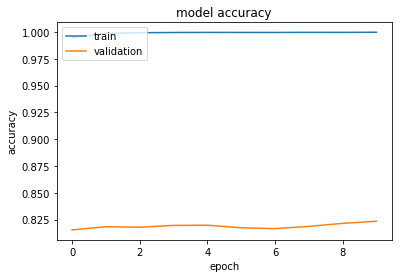

In [204]:
# Plot Accuracy
plotAccuracy(history)

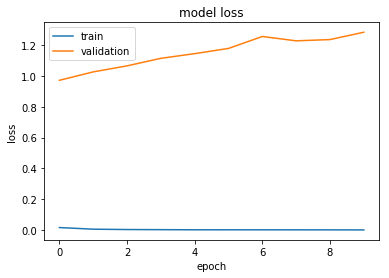

In [205]:
# Plot losses
plotLosses(history)

In [206]:
# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

In [207]:
# Predict score
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.1510911346435546, 0.6199]
